In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from iam.added_absence_detectors import IAM

In [3]:
iam = IAM()

# Bright target/patterned mask

In [4]:
def present_mask_at(iam, position):
    patterned_mask = np.hstack((np.ones((1, 9)), np.zeros((1, 14 - 9))))
    iam.feature_layer.activations[position, :] = patterned_mask
    iam.absence_detector_layer.activations[position, :] = 1 - patterned_mask

In [5]:
def present_mask(iam):
    for position in range(4):
        present_mask_at(iam, position)

In [6]:
def present_nothing_at(iam, position):
    iam.feature_layer.activations[position, :] = np.zeros(14)
    iam.absence_detector_layer.activations[position, :] = np.zeros(14)

In [7]:
def present_letter(iam, word, position):
    iam.present_word(word)
    for j in range(4):
        if j == position:
            continue
        present_nothing_at(iam, j)

In [8]:
def run_bright_trial(iam, word, letter_position=None):
    letter_activations_history = dict(K=[], R = [], D = [], E = [])
    word_activations_history = dict(READ=[], DEAL=[])
    
    def take_snapshot():
        for letter, activation_list in letter_activations_history.items():
            activation_list.append(iam.get_letter_activation(position=1, letter=letter))
        
        for word, activation_list in word_activations_history.items():
            activation_list.append(iam.get_word_activation(word))
    
    n_cycles = 40
    n_stim_cycles = 15
    iam.reset_nodes()
    take_snapshot()
    
    for i in range(n_cycles):
        if i < n_stim_cycles:
            if letter_position is None:
                iam.present_word(word)
            else:
                present_letter(iam, word, letter_position)
        else:
            present_mask(iam)

        iam.run_cycle()
        take_snapshot()
    
    return letter_activations_history, word_activations_history

## Word condition 

In [9]:
letter_activations_history, word_activations_history = run_bright_trial(iam, 'READ', letter_position=None)

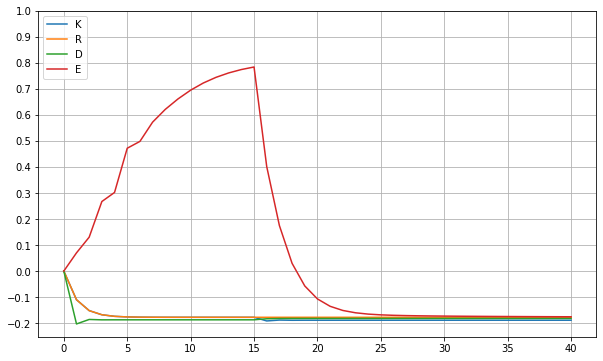

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(list(letter_activations_history.values())).T)
plt.legend(list(letter_activations_history.keys()), loc='upper left')
plt.grid()
plt.yticks(np.arange(-0.2, 1.1, 0.1));

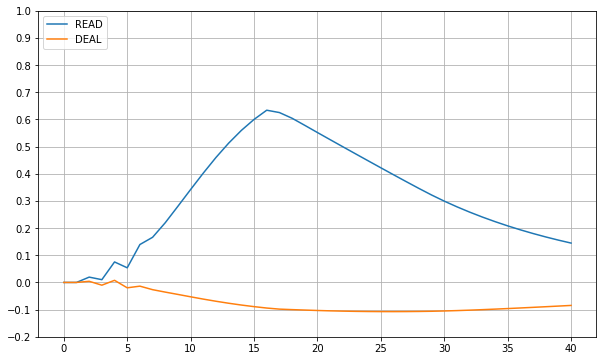

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(list(word_activations_history.values())).T)
plt.legend(list(word_activations_history.keys()), loc='upper left')
plt.grid()
plt.yticks(np.arange(-0.2, 1.1, 0.1));

## Letter with number signs

In [12]:
letter_activations_history, word_activations_history = run_bright_trial(iam, 'READ', letter_position=1)

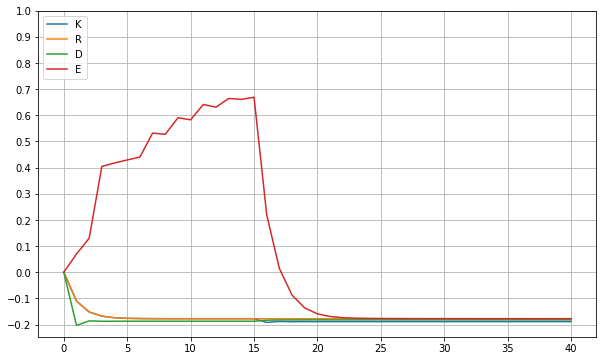

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(list(letter_activations_history.values())).T)
plt.legend(list(letter_activations_history.keys()), loc='upper left')
plt.grid()
plt.yticks(np.arange(-0.2, 1.1, 0.1));

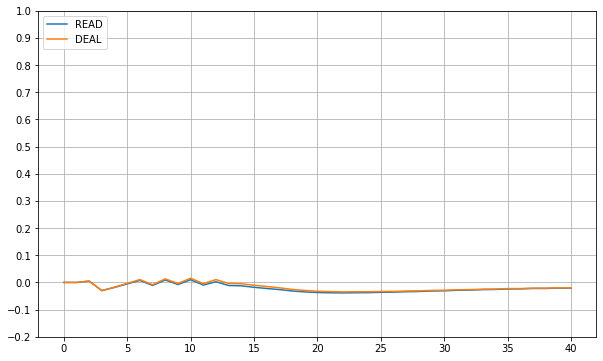

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(list(word_activations_history.values())).T)
plt.legend(list(word_activations_history.keys()), loc='upper left')
plt.grid()
plt.yticks(np.arange(-0.2, 1.1, 0.1));